<a href="https://colab.research.google.com/github/eranraz1/DeepLearning/blob/main/step2_2_1_bert_model_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-clf-multilabel-dsproject/df_tagB.refine1.csv
/kaggle/input/mcdonalds-clf-multilabel-dsproject/df_tag.csv
/kaggle/input/mcdonalds-clf-multilabel-dsproject/df_tagB.csv
/kaggle/input/mcdonalds-clf-multilabel-dsproject/df_tag_vertical.csv


In [ ]:
os.getcwd()

'/kaggle/working'

In [ ]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
#data_raw = pd.read_csv('/kaggle/input/mcdonalds-clf-multilabel-dsproject/df_tagB.csv')

#########            on refined version 
#data_raw = pd.read_csv('/kaggle/input/mcdonalds-clf-multilabel-dsproject/df_tagB.refine1.csv')
data_raw = pd.read_csv('https://raw.githubusercontent.com/eranraz1/DeepLearning/main/testing/data/df_tagB.refine1.csv')

In [ ]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 1636
Number of columns in data = 10


**Sample data:**


,Unnamed: 0,tag,city,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
0,0,"['SlowService', 'RudeService', 'BadFood']",New York,"mcdonalds on bowery has an ""oriental"" design. ...",0.0,1.0,0.0,0.0,1.0,0.0
1,1,['ScaryMcDs'],Las Vegas,"this place is quite sub par, even for a mcdona...",0.0,0.0,1.0,0.0,0.0,0.0
2,2,['na'],New York,i stopped by here in a hurry to get a quick bi...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,['na'],Houston,there are good and bad fast food restaurants a...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,['BadFood'],0Unknown,"i live very close, stop this morning at 5:50 a...",0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
## before refined
#data_raw = data_raw.iloc[:, 4:-5]
data_raw = data_raw.iloc[:, 3:]
data_raw.shape
data_raw.head()

,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
0,"mcdonalds on bowery has an ""oriental"" design. ...",0.0,1.0,0.0,0.0,1.0,0.0
1,"this place is quite sub par, even for a mcdona...",0.0,0.0,1.0,0.0,0.0,0.0
2,i stopped by here in a hurry to get a quick bi...,0.0,0.0,0.0,0.0,0.0,0.0
3,there are good and bad fast food restaurants a...,0.0,0.0,0.0,0.0,0.0,0.0
4,"i live very close, stop this morning at 5:50 a...",0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data = data_raw

In [ ]:
data_raw.columns

Index(['review', 'Filthy', 'BadFood', 'ScaryMcDs', 'Cost', 'Service',
       'Order_issue'],
      dtype='object')

In [ ]:
data[data.Cost == 1].iloc[5,0]

'i feel like my father right now. ξ"i am not mad... i am just disappointed." ξi can not believe i paid for an iced carmel mocha. it was gross and tasted like super sweet burned coffee. it was not served with the typical cone lid and whipped cream and fancy looking swirl of chocolate and carmel on top either. i even double checked when i received it and the clerk assured me in her best english accent that it was in-fact an "iced mocha." ξwrong. i have been ordering these for awhile and this was not up to par. i believe they charged me the higher price and just gave me an iced coffee. i guess i should expect this from mcdonald is. especially when their staff is still trying to master the english language. i can not expect them to understand me and successfully complete my order. can i?! ξkeep looking for another morning caffeine kick or pony up an extra couple of bucks for starbucks across the street.'

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re
# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# def cleanHtml(sentence):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, ' ', str(sentence))
#     return cleantext
# def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
#     cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
#     cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
#     cleaned = cleaned.strip()
#     cleaned = cleaned.replace("\n"," ")
#     return cleaned
# def keepAlpha(sentence):
#     alpha_sent = ""
#     for word in sentence.split():
#         alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
#         alpha_sent += alpha_word
#         alpha_sent += " "
#     alpha_sent = alpha_sent.strip()
#     return alpha_sent
# data['review'] = data['review'].str.lower()
# data['review'] = data['review'].apply(cleanHtml)
# data['review'] = data['review'].apply(cleanPunc)
# data['review'] = data['review'].apply(keepAlpha)

In [ ]:
# stemmer = SnowballStemmer("english")
# def stemming(sentence):
#     stemSentence = ""
#     for word in sentence.split():
#         stem = stemmer.stem(word)
#         stemSentence += stem
#         stemSentence += " "
#     stemSentence = stemSentence.strip()
#     return stemSentence
# data['review'] = data['review'].apply(stemming)

In [ ]:
# data.head(5)

In [ ]:

data.review[1]

'this place is quite sub par, even for a mcdonald is. ξthis place is really ghetto, and there is always a bunch of annoying kids loitering and taking up the available tables. ξi guess it is ok if you want to grab a soda on a hot day or a snack to munch on while walking around, but again, it is not very good... for your health or for taste. ξi say, exert some self-discipline, buy something worthwhile in walmart is grocery section, then go home and prepare something worth eating.'

In [ ]:
######################################################################

In [ ]:
#! conda install -c conda-forge pytorch-lightning

In [ ]:
from tqdm.auto import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast as BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy, f1, auroc
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 123
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
pl.seed_everything(RANDOM_SEED)

2021-10-07 21:21:13.226030: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


123

In [ ]:
data.shape

(1636, 7)

In [ ]:
df = data.copy()

In [ ]:
df[df.iloc[:,2:8].sum(axis=1) > 0]

,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
0,"mcdonalds on bowery has an ""oriental"" design. ...",0.0,1.0,0.0,0.0,1.0,0.0
1,"this place is quite sub par, even for a mcdona...",0.0,0.0,1.0,0.0,0.0,0.0
4,"i live very close, stop this morning at 5:50 a...",0.0,1.0,0.0,0.0,0.0,0.0
5,"like all other mcdonald is, the service qualit...",0.0,0.0,0.0,0.0,1.0,0.0
8,with the amount of time it takes to get your o...,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1628,the drive thru line is always so long. they on...,0.0,0.0,0.0,0.0,1.0,0.0
1629,hands down worst mcdonald is we have ever visi...,0.0,1.0,0.0,0.0,1.0,0.0
1630,this mcdonald is has pretty poor customer serv...,0.0,0.0,0.0,0.0,1.0,0.0
1631,"this has to be the worst mcdonalds within a 3,...",0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape

(1636, 7)

In [ ]:
import gc
del data,data_raw 
gc.collect()

137

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2,shuffle = True)
train_df.shape, test_df.shape

((1308, 7), (328, 7))

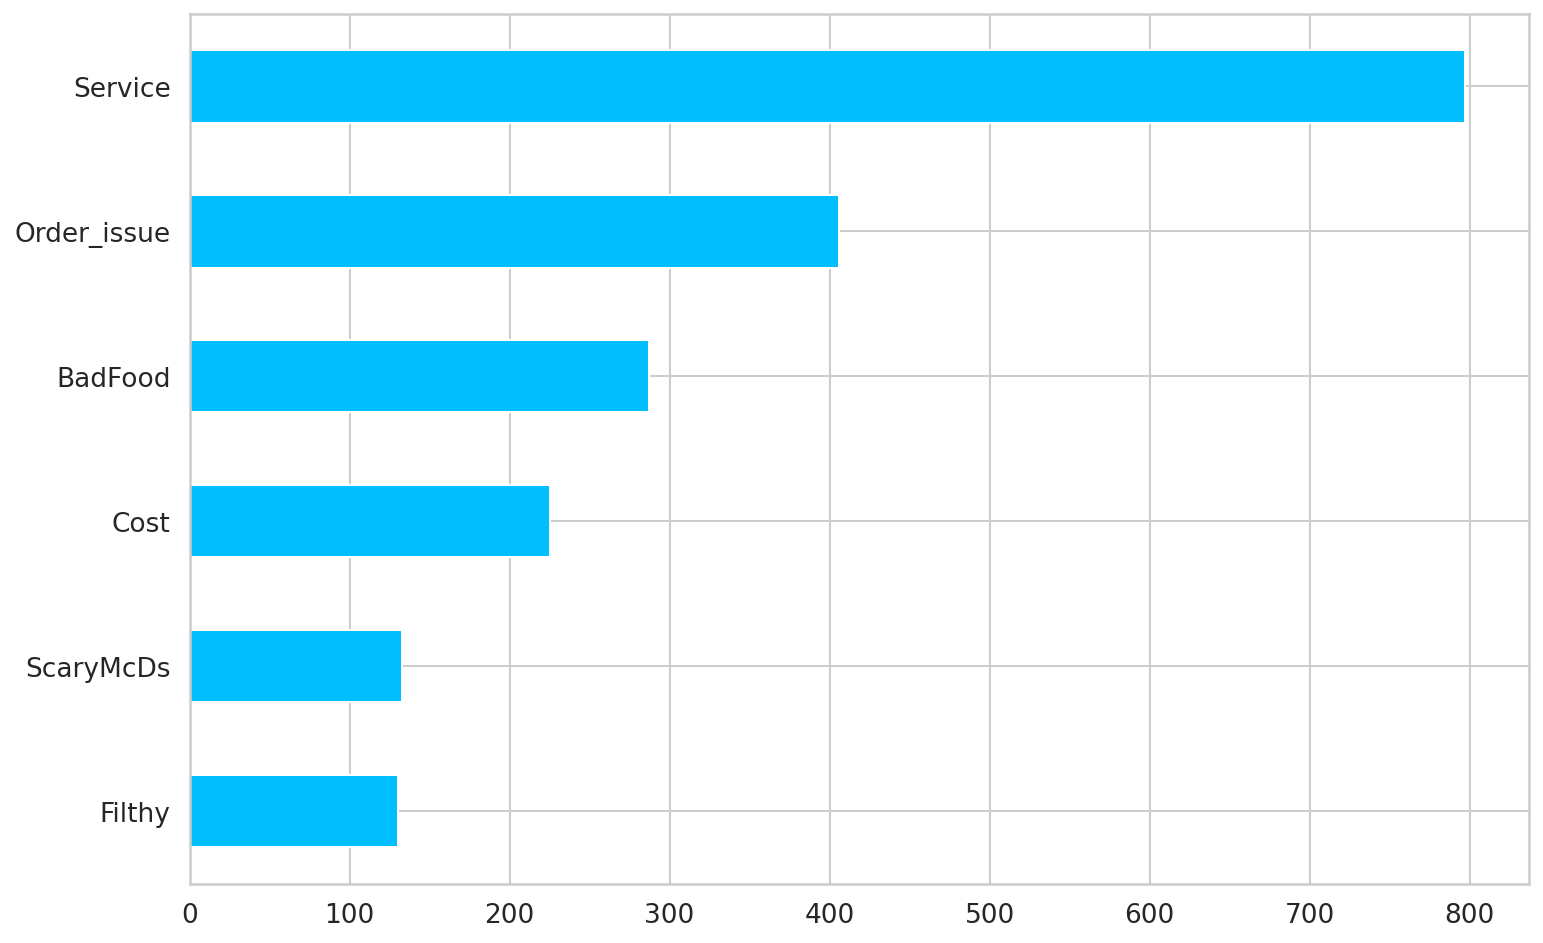

In [ ]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df[LABEL_COLUMNS].sum().sort_values().plot(kind="barh");

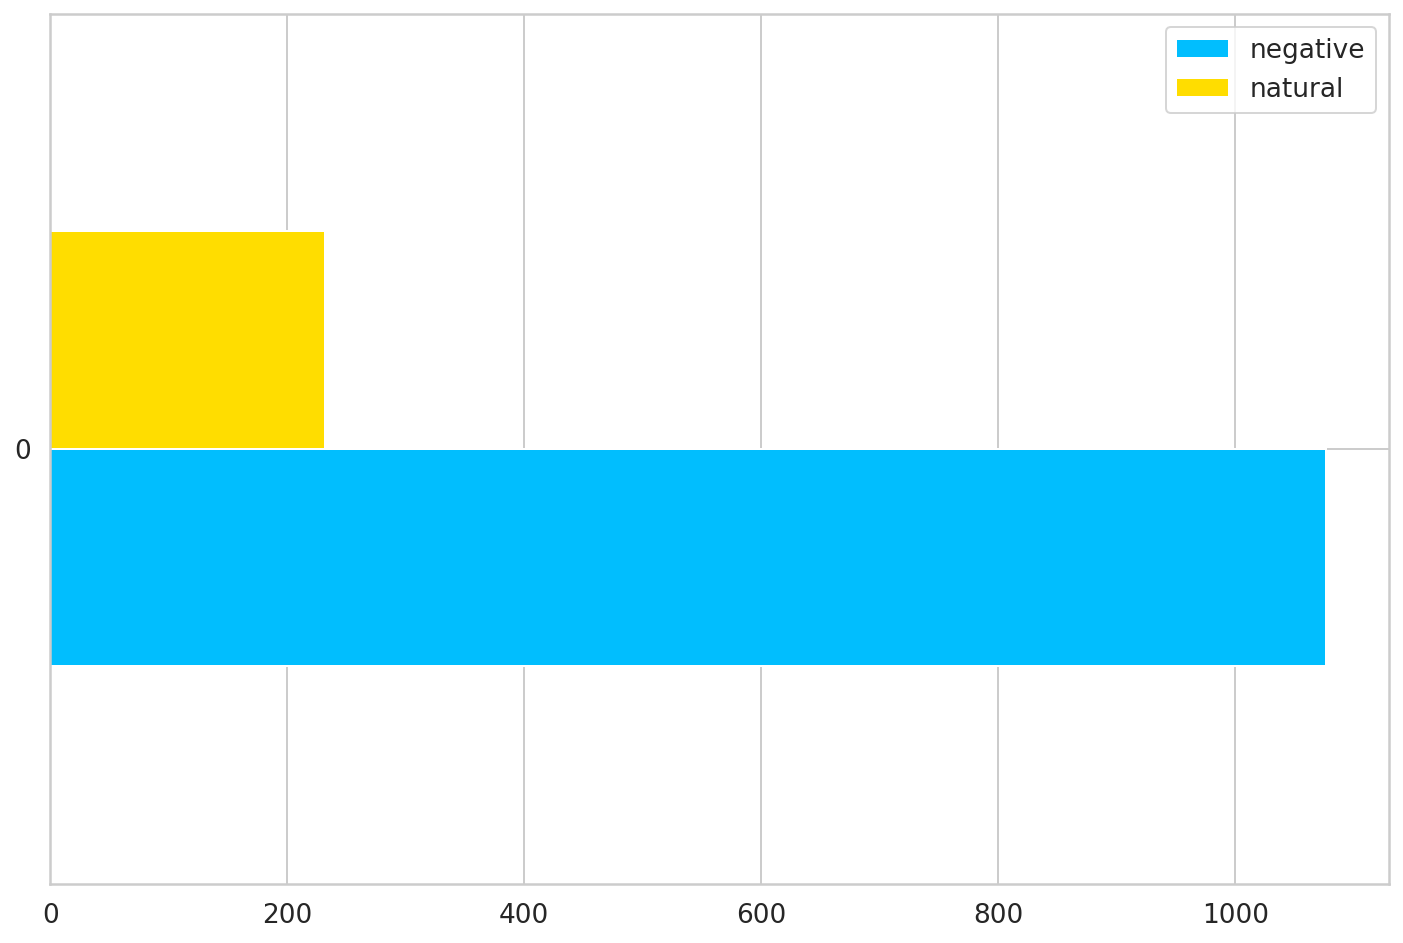

In [ ]:
train_negative = train_df[train_df[LABEL_COLUMNS].sum(axis=1) > 0]
train_positive = train_df[train_df[LABEL_COLUMNS].sum(axis=1) == 0]
pd.DataFrame(dict(
  negative=[len(train_negative)],
  natural=[len(train_positive)]
)).plot(kind='barh');

In [ ]:
train_df

,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
838,i have had my order messed up at this location...,0.0,0.0,0.0,0.0,0.0,1.0
535,just went thru the drive-thru paid for a mediu...,0.0,0.0,0.0,0.0,0.0,1.0
116,dishonest employees. they are currently runnin...,0.0,0.0,0.0,0.0,1.0,1.0
1292,sooo i was in a rush and stopped here before w...,0.0,1.0,0.0,0.0,0.0,0.0
1198,this is the only mcdonald is near my work and ...,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
1122,"great people,great atmosphere , and the cashie...",0.0,0.0,0.0,0.0,0.0,0.0
1346,went through the drive-thru today at about 11:...,0.0,1.0,0.0,0.0,0.0,1.0
1406,this place is terrible. we went through the dr...,0.0,0.0,0.0,0.0,0.0,1.0
1389,it is mcdonald is what else can you say.,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
BERT_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [ ]:
sample_row = df.iloc[7]
sample_comment = sample_row.review
sample_labels = sample_row[LABEL_COLUMNS]
print(sample_comment)
print()
print(sample_labels.to_dict())

i do not understand why people have qualms with this mcdonald is. it is a mcdonald is. it is standard. their business model is standardization. ξit is "a-ok" just a plain old mcdonald is. never had anything crazy occur to me here!

{'Filthy': 0.0, 'BadFood': 0.0, 'ScaryMcDs': 0.0, 'Cost': 0.0, 'Service': 0.0, 'Order_issue': 0.0}


In [ ]:
encoding = tokenizer.encode_plus(
  sample_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
encoding["input_ids"].shape, encoding["attention_mask"].shape

(torch.Size([1, 512]), torch.Size([1, 512]))

In [ ]:
encoding["input_ids"][0][0:250]

tensor([  101,   178,  1202,  1136,  2437,  1725,  1234,  1138,   186,  4746,
         4206,  1114,  1142,   182,  1665,  3842, 18728,  1110,   119,  1122,
         1110,   170,   182,  1665,  3842, 18728,  1110,   119,  1122,  1110,
         2530,   119,  1147,  1671,  2235,  1110,  2530,  2734,   119,   431,
         2875,  1110,   107,   170,   118, 21534,   107,  1198,   170,  6188,
         1385,   182,  1665,  3842, 18728,  1110,   119,  1309,  1125,  1625,
         4523,  4467,  1106,  1143,  1303,   106,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
encoding["attention_mask"][0][0:250]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#inverse the tokenization and get back (kinda) the words from the token id

print(tokenizer.convert_ids_to_tokens(encoding["input_ids"].squeeze())[:250])

['[CLS]', 'i', 'do', 'not', 'understand', 'why', 'people', 'have', 'q', '##ual', '##ms', 'with', 'this', 'm', '##c', '##don', '##ald', 'is', '.', 'it', 'is', 'a', 'm', '##c', '##don', '##ald', 'is', '.', 'it', 'is', 'standard', '.', 'their', 'business', 'model', 'is', 'standard', '##ization', '.', 'ξ', '##it', 'is', '"', 'a', '-', 'ok', '"', 'just', 'a', 'plain', 'old', 'm', '##c', '##don', '##ald', 'is', '.', 'never', 'had', 'anything', 'crazy', 'occur', 'to', 'me', 'here', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[

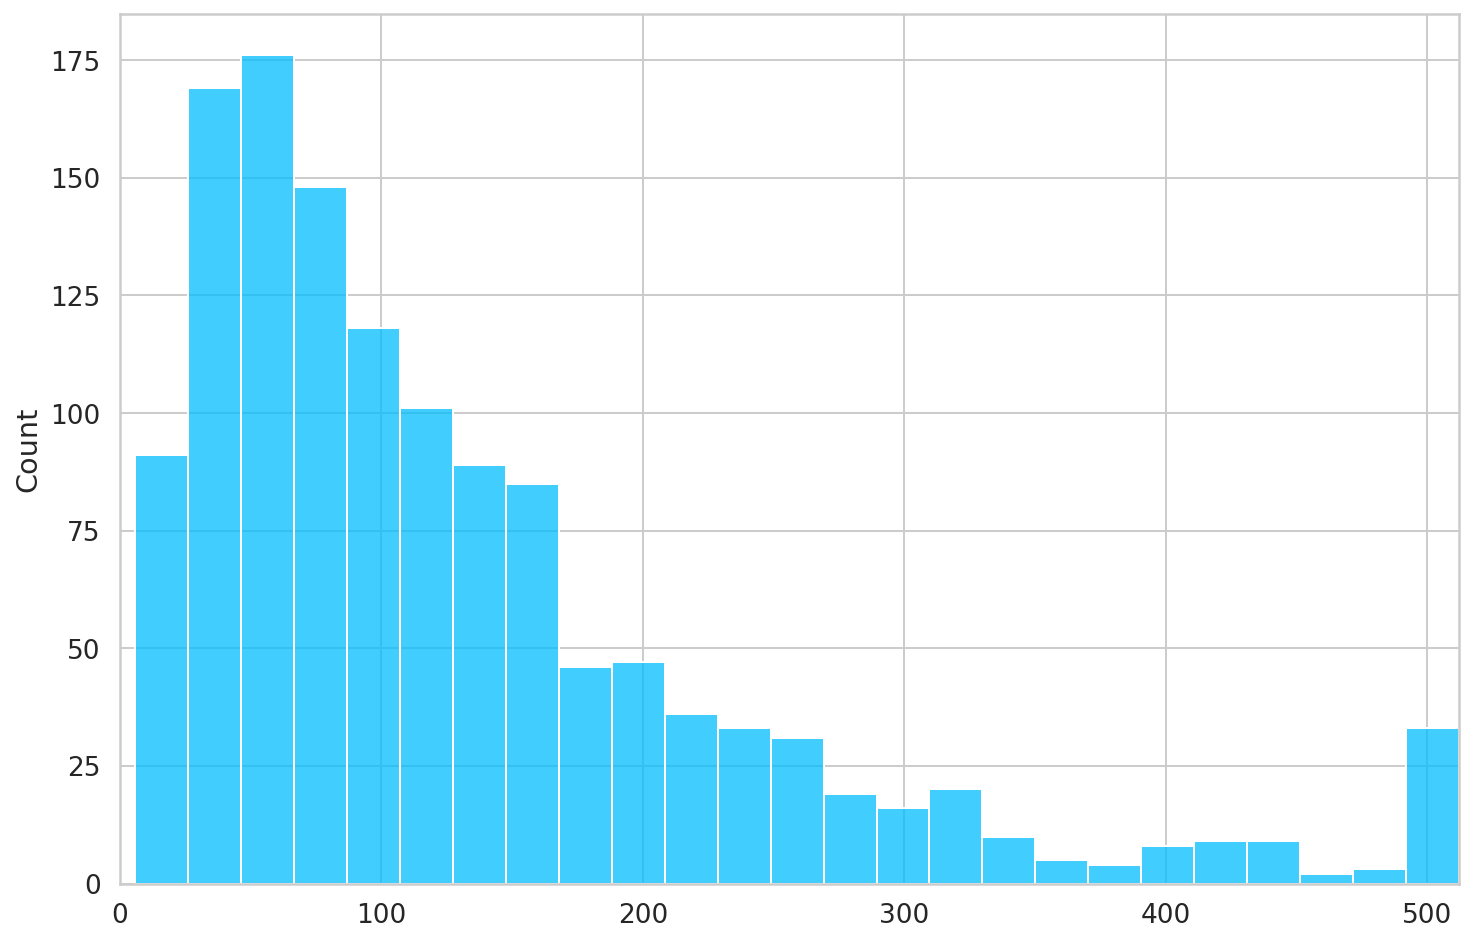

In [ ]:
#  specify the maximum number of tokens when encoding (512 is the maximum we can do)

token_counts = []
for _, row in train_df.iterrows():
  token_count = len(tokenizer.encode(
    row["review"],
    max_length= 512,
    truncation=True
  ))
  token_counts.append(token_count)
    
sns.histplot(token_counts)
plt.xlim([0, 512]);

In [ ]:
del token_counts, encoding
gc.collect()

11110

In [ ]:
# I'll stick with 300 

MAX_TOKEN_COUNT = 512 #512

In [ ]:
# We’ll wrap the tokenization process in a PyTorch Dataset, along with converting the labels to tensors:

class ReviewsDataset(Dataset):
  def __init__(self,data: pd.DataFrame,tokenizer: BertTokenizer,max_token_len: int = 128):
    self.tokenizer = tokenizer
    self.data = data
    self.max_token_len = max_token_len
  def __len__(self):
    return len(self.data)
  def __getitem__(self, index: int):
    data_row = self.data.iloc[index]
    review = data_row.review
    labels = data_row[LABEL_COLUMNS]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_token_len,
      return_token_type_ids=False,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return dict(
      review=review,
      input_ids=encoding["input_ids"].flatten(),
      attention_mask=encoding["attention_mask"].flatten(),
      labels=torch.FloatTensor(labels)
    )

In [ ]:
# Let’s have a look at a sample item from the dataset:
train_dataset = ReviewsDataset(
  train_df,
  tokenizer,
  max_token_len=MAX_TOKEN_COUNT
)
sample_item = train_dataset[0]
sample_item.keys()


In [ ]:
sample_item["review"]

In [ ]:
sample_item["labels"]

In [ ]:
sample_item["input_ids"].shape

In [ ]:
train_dataset.data.head(5)

In [ ]:
# Let’s load the BERT model and pass a sample of batch data through

bert_model = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
sample_batch = next(iter(DataLoader(train_dataset, batch_size=8, num_workers=4, pin_memory= True)))
sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

In [ ]:
output = bert_model(sample_batch["input_ids"], sample_batch["attention_mask"])

In [ ]:
output.last_hidden_state.shape, output.pooler_output.shape

In [ ]:
# Note! - The 768 dimension comes from the BERT hidden size
bert_model.config.hidden_size

In [ ]:
gc.collect()

In [ ]:
# Wrap the custom dataset into a LightningDataModule
# The ReviewsDataModule - will encapsulates all data loading logic and returns the necessary data loaders

class ReviewsDataModule(pl.LightningDataModule):
  def __init__(self, train_df, test_df, tokenizer, batch_size=8, max_token_len=128):
    super().__init__()
    self.batch_size = batch_size
    self.train_df = train_df
    self.test_df = test_df
    self.tokenizer = tokenizer
    self.max_token_len = max_token_len
  def setup(self, stage=None):
    self.train_dataset = ReviewsDataset(
      self.train_df,
      self.tokenizer,
      self.max_token_len
    )
    self.test_dataset = ReviewsDataset(
      self.test_df,
      self.tokenizer,
      self.max_token_len
    )
  def train_dataloader(self):
    return DataLoader(
      self.train_dataset,
      batch_size=self.batch_size,
      shuffle=True,
      num_workers=4, pin_memory= True
    )
  def val_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=4 ,pin_memory= True
    )
  def test_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=4 , pin_memory= True
    )


In [ ]:
# create an instance of our data module

N_EPOCHS = 6
BATCH_SIZE = 10
data_module = ReviewsDataModule(
  train_df,
  test_df,
  tokenizer,
  batch_size=BATCH_SIZE,
  max_token_len=MAX_TOKEN_COUNT
)


## Model
**model** will use a pre-trained BertModel and a linear layer to convert the BERT representation to a classification task.
We’ll pack everything in a LightningModule

**points of interest** - optimizers configuretion and calculating ROC

In [ ]:
class ReviewsTagger(pl.LightningModule):
  def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None):
    super().__init__()
    self.bert = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
    self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.n_training_steps = n_training_steps
    self.n_warmup_steps = n_warmup_steps
    self.criterion = nn.BCELoss()
  def forward(self, input_ids, attention_mask, labels=None):
    output = self.bert(input_ids, attention_mask=attention_mask)
    output = self.classifier(output.pooler_output)
    output = torch.sigmoid(output)
    loss = 0
    if labels is not None:
        loss = self.criterion(output, labels)
    return loss, output
  def training_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("train_loss", loss, prog_bar=True, logger=True)
    return {"loss": loss, "predictions": outputs, "labels": labels}
  def validation_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss
  def training_epoch_end(self, outputs):
    labels = []
    predictions = []
    for output in outputs:
      for out_labels in output["labels"].detach().cpu():
        labels.append(out_labels)
      for out_predictions in output["predictions"].detach().cpu():
        predictions.append(out_predictions)
    labels = torch.stack(labels).int()
    predictions = torch.stack(predictions)
    for i, name in enumerate(LABEL_COLUMNS):
      class_roc_auc = auroc(predictions[:, i], labels[:, i])
      self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)
  def configure_optimizers(self):
    optimizer = AdamW(self.parameters(), lr=0.0001)
    scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=self.n_warmup_steps,
      num_training_steps=self.n_training_steps
    )
    return dict(
      optimizer=optimizer,
      lr_scheduler=dict(
        scheduler=scheduler,
        interval='step'
      )
    )

**Optimizer schedule**r - Change the learning rate of the optimizer during training. This might lead to better performance of our model. We’ll use the get_linear_schedule_with_warmup.

In [ ]:
#  simple example to make things clearer

dummy_model = nn.Linear(2, 1)
optimizer = AdamW(params=dummy_model.parameters(), lr=0.001)
warmup_steps = 20
total_training_steps = 100
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=warmup_steps,
  num_training_steps=total_training_steps
)
learning_rate_history = []
for step in range(total_training_steps):
  optimizer.step()
  scheduler.step()
  learning_rate_history.append(optimizer.param_groups[0]['lr'])
plt.plot(learning_rate_history, label="learning rate")
plt.axvline(x=warmup_steps, color="red", linestyle=(0, (5, 10)), label="warmup end")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Learning rate")
plt.tight_layout();

print('Linear learning rate scheduling over training steps')

To use the scheduler, we need to calculate the number of training and warm-up steps. The number of training steps per epoch is equal to number of training examples / batch size. The number of total training steps is training steps per epoch * number of epochs

We’ll use a םמק tenth of the training steps for a warm-up:

In [ ]:
steps_per_epoch=len(train_df) // BATCH_SIZE
total_training_steps = steps_per_epoch * N_EPOCHS

warmup_steps = total_training_steps //10
warmup_steps, total_training_steps

In [ ]:
# create an instance of the model
model = ReviewsTagger(
  n_classes=len(LABEL_COLUMNS),
  n_warmup_steps=warmup_steps,
  n_training_steps=total_training_steps
)


### Evaluation
using **Binary Cross Entropy** to measure the error for each label. PyTorch has **BCELoss**, over a sigmoid function 

In [ ]:
# example - Loss Calc

criterion = nn.BCELoss()
prediction = torch.FloatTensor([10.95873564, 1.07321467, 1.58524066, 0.03839076, 15.72987556, 1.09513213])

labels = torch.FloatTensor([1., 0., 0., 0., 1., 0.])

print(torch.sigmoid(prediction))
print(criterion(torch.sigmoid(prediction), labels))

In [ ]:
# calculate the loss of the prediction

_, predictions = model(sample_batch["input_ids"], sample_batch["attention_mask"])
predictions

In [ ]:
criterion(predictions, sample_batch["labels"])

In [ ]:
gc.collect()

### ROC Curve
The area under the Receiver operating characteristic (ROC) for each tag. ROC is created by plotting the True Positive Rate (TPR) vs False Positive Rate (FPR)

![image.png](attachment:2bd8a67f-1611-4932-8b67-af1438a334c8.png)

In [ ]:
from sklearn import metrics
fpr = [0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.11428571, 0.11428571, 0.2       , 0.4       , 1.        ]
tpr = [0.        , 0.01265823, 0.67202532, 0.76202532, 0.91468354,
       0.97468354, 0.98734177, 0.98734177, 1.        , 1.        ]
_, ax = plt.subplots()
ax.plot(fpr, tpr, label="ROC")
#ax.plot([0.05, 0.95], [0.05, 0.95], transform=ax.transAxes, label="Random classifier", color="red")
ax.legend(loc=4)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("Example ROC curve")
plt.show();

print('Example ROC value of a trained classifier vs random classifier')

### Training
we'll use at least 3 components - **Checkpointing** that saves the best model (based on validation loss):

In [ ]:
checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val_loss",
    mode="min")

In [ ]:
# Log the progress in TensorBoard:

logger = TensorBoardLogger("lightning_logs", name="reviews")

In [ ]:
# And early stopping triggers when the loss hasn’t improved for the last 2 epochs 

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# start the training process:

trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback, early_stopping_callback],
    max_epochs= N_EPOCHS,
    gpus=1,
    progress_bar_refresh_rate=30)

In [ ]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) 

In [ ]:
#del alldfs
gc.collect()

In [ ]:
alldTS = [var for var in dir() if isinstance(eval(var), torch.Tensor)]

print(alldTS) 

In [ ]:
# del _33, _34, _35, _43,_56, _57
# gc.collect()

In [ ]:
trainer.fit(model, data_module)

In [ ]:
trainer.test()
gc.collect()

**Predictions**
mall sample of predictions after the training is complete. This builds intuition about the quality of the predictions (qualitative evaluation).

Loading the best version (according to the validation loss) of our model:

In [ ]:
trained_model = ReviewsTagger.load_from_checkpoint(
  trainer.checkpoint_callback.best_model_path,
  n_classes=len(LABEL_COLUMNS)
)
trained_model.eval()
trained_model.freeze()

In [ ]:
test_comment = "drive thru mckdonalds the place was very dirty. not clean \
                very filthy very dirty garbage all over"
encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()
for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  print(f"{label}: {prediction}")

![image.png](attachment:9a2047f9-f854-4738-84d3-ca269fbe0bc7.png)

In [ ]:
THRESHOLD = 0.5
test_comment = "drive thru McDonalds waited too much time to order no one available \
                very laid back relaxed. took the time "
encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()
for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  if prediction < THRESHOLD:
    continue
  print(f"{label}: {prediction}")

In [ ]:
THRESHOLD = 0.1
test_comment = "100 USD for burger !!! too expensive  over taxed, cost too much, pay a lot of money . high Cost \
                High value "
encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()
for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  if prediction < THRESHOLD:
    continue
  print(f"{label}: {prediction}")

## Testing / Evaluation

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trained_model = trained_model.to(device)
val_dataset = ReviewsDataset(
  test_df,
  tokenizer,
  max_token_len=MAX_TOKEN_COUNT
)
predictions = []
labels = []
for item in tqdm(val_dataset):
  _, prediction = trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device),
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  predictions.append(prediction.flatten())
  labels.append(item["labels"].int())
predictions = torch.stack(predictions).detach().cpu()
labels = torch.stack(labels).detach().cpu()

In [ ]:
THRESHOLD = 0.5
accuracy(predictions, labels, threshold=THRESHOLD)

check the **ROC** for each tag



In [ ]:
print("AUROC per tag")
for i, name in enumerate(LABEL_COLUMNS):
  tag_auroc = auroc(predictions[:, i], labels[:, i], pos_label=1)
  print(f"{name}: {tag_auroc}")

Check the **classification report** for each class. To make this work, we must apply thresholding to the predictions

In [ ]:
gc.collect()

y_pred = predictions.numpy()
y_true = labels.numpy()
upper, lower = 1, 0
y_pred = np.where(y_pred > THRESHOLD, upper, lower)
print(classification_report(
  y_true,
  y_pred,
  target_names=LABEL_COLUMNS,
  zero_division=0
))

![image.png](attachment:11fbcf9a-34cb-41fa-abca-e489bf49334f.png)

In [ ]:
print('finish')